In [79]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Charger les données (par exemple dans un DataFrame)
data = pd.read_csv("financials.csv")
data = data.dropna()  # Supprimer les lignes contenant des valeurs manquantes
data.isnull().sum()  # Vérifier s'il reste des valeurs manquantes




Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64

In [80]:
# Définir le nombre d'états et d'actions
states = len(data)  # Chaque ligne représente un état
actions = 3  # Actions possibles : 0 (Acheter), 1 (Vendre), 2 (Rester)



In [81]:
# Initialiser la table Q avec des valeurs nulles
Q = np.zeros((states, actions))

# Paramètres d'apprentissage
alpha = 0.1  # Taux d'apprentissage
gamma = 0.9  # Facteur de réduction de récompense future
epsilon = 0.1  # Taux d'exploration 

In [82]:
# Fonction pour obtenir la récompense pour une action
def get_reward(state, action, data):
    if action == 0:  # Acheter
        if state + 1 < states:
            return (data.iloc[state + 1]["Price"] - data.iloc[state]["Price"]) / data.iloc[state]["Price"]
        return -1  # Pénalité si hors limites
    elif action == 1:  # Vendre
        if state - 1 >= 0:
            return (data.iloc[state]["Price"] - data.iloc[state - 1]["Price"]) / data.iloc[state - 1]["Price"]
        return -1  # Pénalité si hors limites
    else:  # Rester
        return 0


In [83]:
# Fonction pour choisir l'action en suivant une stratégie epsilon-greedy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(actions))  # Exploration
    else:
        return np.argmax(Q[state])  # Exploitation (choisir la meilleure action)


In [84]:
# Q-learning - apprentissage
for episode in range(10):  # Nombre d'épisodes
    state = random.randint(0, states - 1)  # Choisir un état de départ aléatoire
    done = False

    while not done:
        action = choose_action(state)
        reward = get_reward(state, action, data)
        
        # Déterminer le prochain état
        if action == 0 and state + 1 < states:
            next_state = state + 1
        elif action == 1 and state - 1 >= 0:
            next_state = state - 1
        else:
            next_state = state  # Rester dans le même état pour "Rester"

        # Mise à jour de la table Q
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        
        # Vérifier si l'épisode est terminé
        if next_state == state or next_state < 0 or next_state >= states:
            done = True
        
        state = next_state

# L'agent a appris une politique, vous pouvez maintenant obtenir les actions optimales pour chaque état
optimal_actions = np.argmax(Q, axis=1)


In [85]:
nbrVendre=0
nbrAcheter=0
nbrRest=0
for i in range(states):
    action = optimal_actions[i]
    if action == 0:
        print(f"State {i}: Acheter")
        nbrAcheter=nbrAcheter+1
    elif action == 1:
        print(f"State {i}: Vendre")
        nbrVendre=nbrVendre+1
    else:
        print(f"State {i}: Rester")
        nbrRest=nbrRest+1

print("Nombre d'achat : ",nbrAcheter)
print("Nombre de vente : ",nbrVendre)
print("Nombre de rester : ",nbrRest)
        


State 0: Acheter
State 1: Acheter
State 2: Acheter
State 3: Acheter
State 4: Acheter
State 5: Acheter
State 6: Acheter
State 7: Acheter
State 8: Acheter
State 9: Acheter
State 10: Acheter
State 11: Acheter
State 12: Acheter
State 13: Acheter
State 14: Acheter
State 15: Acheter
State 16: Acheter
State 17: Acheter
State 18: Acheter
State 19: Acheter
State 20: Acheter
State 21: Acheter
State 22: Acheter
State 23: Acheter
State 24: Acheter
State 25: Acheter
State 26: Acheter
State 27: Acheter
State 28: Acheter
State 29: Acheter
State 30: Acheter
State 31: Acheter
State 32: Acheter
State 33: Acheter
State 34: Acheter
State 35: Acheter
State 36: Acheter
State 37: Acheter
State 38: Acheter
State 39: Acheter
State 40: Acheter
State 41: Acheter
State 42: Acheter
State 43: Acheter
State 44: Acheter
State 45: Acheter
State 46: Acheter
State 47: Acheter
State 48: Acheter
State 49: Acheter
State 50: Acheter
State 51: Acheter
State 52: Acheter
State 53: Acheter
State 54: Acheter
State 55: Acheter
St

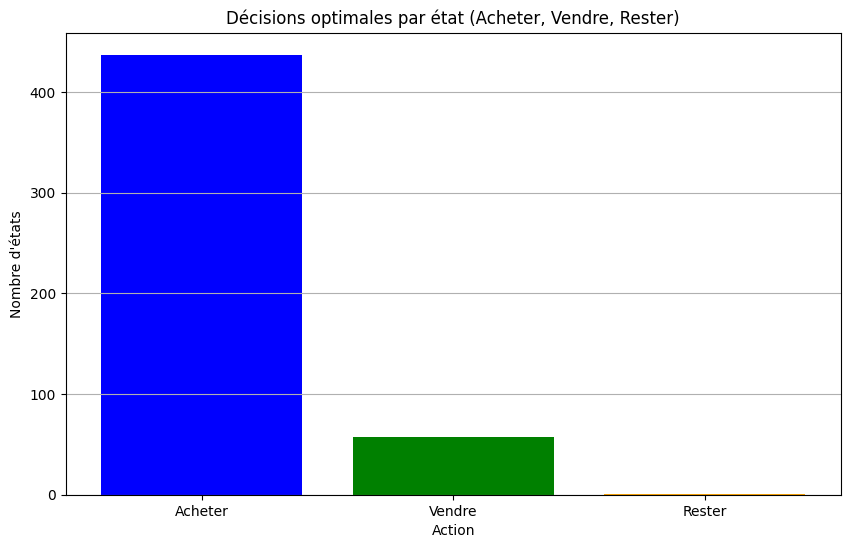

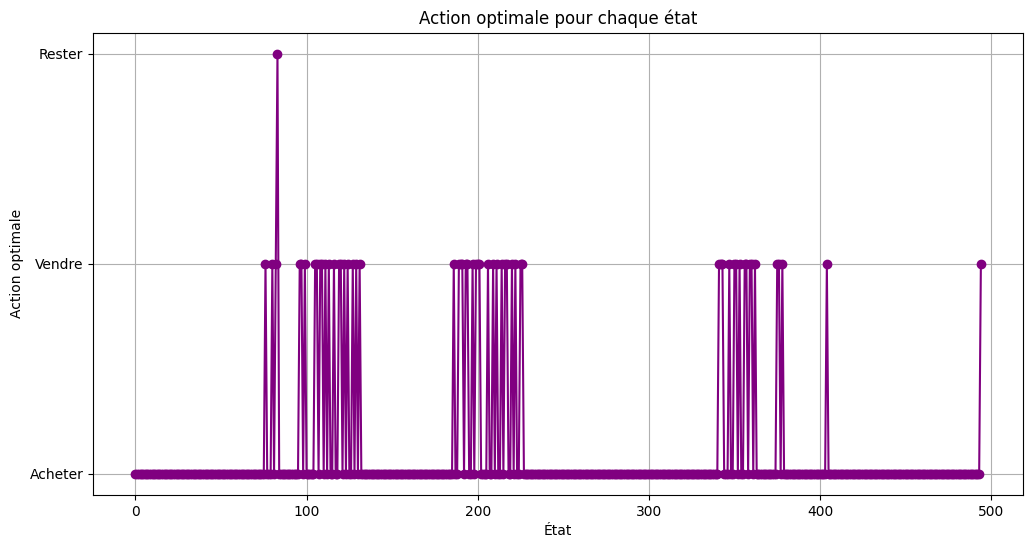

In [86]:
# L'agent a appris une politique, vous pouvez maintenant obtenir les actions optimales pour chaque état
optimal_actions = np.argmax(Q, axis=1)

# --- Tracer les décisions optimales par état ---
states_list = range(states)
actions_labels = ["Acheter", "Vendre", "Rester"]

# Compter les occurrences de chaque action
action_counts = [np.sum(optimal_actions == i) for i in range(actions)]

# Diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(actions_labels, action_counts, color=['blue', 'green', 'orange'])
plt.xlabel("Action")
plt.ylabel("Nombre d'états")
plt.title("Décisions optimales par état (Acheter, Vendre, Rester)")
plt.grid(axis='y')
plt.show()

# --- Optionnel : Diagramme des actions par état ---
plt.figure(figsize=(12, 6))
plt.plot(states_list, optimal_actions, marker='o', linestyle='-', color='purple')
plt.yticks([0, 1, 2], actions_labels)
plt.xlabel("État")
plt.ylabel("Action optimale")
plt.title("Action optimale pour chaque état")
plt.grid()
plt.show()